# 순환 신경망 (RNN)

지금까지 다룬 신경망은 구성이 단순하여 구조를 이해하기 쉽고, 많은 문제데 응용할 수 있었다. 하지만, 시계열 데이터를 다루지 못하는 단점이 있다. 더 정확하게 말하면, 단순한 피드포워드 신경망에서는 시계열 데이터의 성질(패턴)을 충분히 학습할 수 없다. 그래서 **순환 신경망 (RNN)**이 등장하게 된다.

## 5.1 확률과 언어 모델

### 5.1.1 word2vec을 확률 관점에서 바라보다 

**word2vec**의 **CBOW** 모델을 보면 다음과 같이 $w_{t-1}$, $w_{t+1}$로부터 $w_t$를 추측하는 일을 수행한다.

그림 맥락으로 $Word_{t-1}$ 과 $Word_{t+1}$ 이 주어졌을 때, $Word_{t}$가 될 확률은 수식으로 다음과 같이 나타낼 수 있다.

**[그림 5-1] COBW 모델의 신경망 구성 예**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%203-22.PNG?raw=true" width="800">

**CBOW** 모델을 확률 표기법으로 기술해 보자.

- **CBOW 모델을 확률로 표기** 

$$
P(Word_{t} | Word_{t-1}, Word_{t+1})
$$

지금까지 맥락을 항상 좌우 대칭으로 생각했었지만, 이번에는 맥락을 왼쪽 윈도우만으로 한정해보자. [그림 5-2]와 같은 경우를 생각해보자.

**[그림 5-2] 왼쪽 윈도우만 맥락으로 고려**
<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-3.PNG?raw=true" width="800">

- **CBOW 모델이 출력할 확률로 표기** 

$$
P(Word_{t} | Word_{t-2}, Word_{t-1})
$$

- 손실 함수(샘플 데이터 하나)

$$
L = - \log P(Word_{t}|Word_{t-2} , Word_{t-1})
$$

### 5.1.2 언어 모델

**언어 모델**은 단어 나열에 확률을 부여한다.  
특정한 단어의 시퀀스에 대해서, 그 시퀀스가 일어날 가능성이 어느 정도인지(얼마나 자연스러운 단어 순서인지)를 확률로 평가하는 것이다.

> e.g.  
> 
> "you say goodbye"라는 단어 시퀀스에는 높은 확률(0.092)
>
> "you say good die"라는 단어 시퀀스에는 낮은 확률(0.00000000032)

위 처럼 출력하는 것이 일종의 언어 모델이다.


이 언어 모델은 다양하게 응요할 수 있다. 기계 번역과 음성 인식이 대표적인 예이다.  
예를 들면 음석 인식 시스템의 경우, 사람의 음성으로부터 몇 개의 문장을 후보로 생성할 것이다. 그런 다음 언어 모델을 사용하여 후보 문장이 "문장으로써 자연스러운지"를 기준으로 순서를 매길 수 있다.

또한 언어 모델은 새로운 문장을 생성하는 용도로도 이용할 수 있다. 언어 모델은 단어 순서의 자연스러움을 확률적으로 평가할 수 있기 때문에, 그 확률분포에 따라 다음으로 적합한 단어를 '자아낼'(샘플링) 할 수 있기 때문이다. 

#### [언어 모델을 수식으로 설명]

- $w_1, \cdots, w_m$ 이라는 $m$개의 단어로 된 문장을 생각해보자.  
이때 단어가 $w_1, \cdots, w_m$이라는 순으로 출현할 확률을 $P(w_1, \cdots, w_m)$으로 나타낸다.  
이 확률은 여러 사건이 동시에 일어날 확률이므로 동시 확률이라고 한다.  

이 동시 확률 $P(w_1, \cdots, w_m)$은 사후 확률을 사용하여 아래와 같이 분해하여 쓸 수 있다.

#### [식 5-4]

$$
P(w_1, \cdots, w_m) = P(w_m|w_1, \cdots, w_{m-1}) P(w_{m-1}|w_1, \cdots, w_{m-2}) \cdots P(w_3|w_1,w_2)  P(w_2|w_1)  P(w_1)
$$

$$
= \prod_{t=1}^{m} P(w_t|w1,\cdots, w_{t-1} )
$$

[식 5-4]의 결과는 확률의 **곱셈정리**로부터 유도할 수 있다. 

#### Step 1. [확률의 곱셈 정리]

$$
P(A, B) = P(A|B)P(B)
$$

$$
P(A, B) = P(B|A)P(A)
$$

- 확률론에서 가장 중요한 정리. 
- **의미** : $A$와 $B$가 모두 일어날 확률 $P(A, B)$는 "$B$가 일어날 확률 $P(B)$"와 "$B$가 일어난 후 $A$가 일어날 확률 $P(A|B)$"를 곱한 값과 같다는 것이다.(자연스러움)
- 위 둘중 $A$와  $B$ 중 어느 것을 사후 확률의  조건으로 할지에 따라 표시 방법이 다르다.

#### Step 2. 곱셈정리를 사용하여 [식 5-4]를 변형

$$
P(w_1, \cdots, w_{m-1}, w_m) = P(A, w_m) = P(w_m|A)P(A)
$$

- $w_1, \cdots, w_{m-1}$를 하나로 모아 기호 $A$로 나타내었고, 곱셈 정리를 이용하여 [식 5-7]이 유도 된다.

#### Step 3. 곱셈정리를 사용하여 $P(A)$를 변형 

$$
P(A) = P(w_1, \cdots, w_{m-1}) = P(A', w_{m-1}) = P(w_{m-1}|A')P(A')
$$

- 이처럼 단어 시퀀스를 하나씩 줄여가면서 매번 사후 확률로 분해해 간다. 그리고 같은 과정을 반폭하여 **[식 5-4]**를 이끌 수 있다.

$$
P(w_1, \cdots, w_m) = P(w_m|w_1, \cdots, w_{m-1}) P(w_{m-1}|w_1, \cdots, w_{m-2}) \cdots P(w_3|w_1,w_2)  P(w_2|w_1)  P(w_1)
$$

$$
= \prod_{t=1}^{m} P(w_t|w_1,\cdots, w_{t-1} )
$$


#### 주목할 것은 이 사후 확률은 타긴 단어보다 왼쪽에 있는 모든 단어를 맥락(조건)으로 했을 떄의 확률이라는 것이다. 그림으로는 [그림 5-3]처럼 된다.


**[그림 5-3] 언어 모델이 다루는 사후 확률 : $t$번째 단어를 타깃으로 하여 $t$번째보다 왼쪽 단어 모두를 맥락(조건)으로 고려한다.**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-3.PNG?raw=true" width="800">

지금까지 이야기를 정리하면, 우리의 목표는 $P(w_t|w_1,\cdots, w_{t-1})$이라는 확률을 얻는 것이다. 이 확률을 계산할 수 있다면 언어 모델의 동시 확률 $P(w_1, \cdots, w_m)$을 구할 수 있다.

> **NOTE**  
> $P(w_t|w_1,\cdots, w_{t-1})$을 나타내는 모델은 조건부 언어 모델(Conditional Language Model)이라고 부름. 한편 $P(w_t|w_1,\cdots, w_{t-1})$을 나타내는 모델을 가리켜, 그것을 '언어 모델'이라고 하는 경우도 있다.

### 5.1.3 CBOW 모델을 언어 모델로?

그렇다면 word2vec의 CBOW 모델을 (강제로) 언어 모델에 적용하려면 어떻게 하면 좋을까?  
이는 맥락의 크기를 특정 값으로 한정하여 근사적으토 나타낼 수 있다. 수식으로는 다음과 같다.

$$
P(w_1, \cdots, w_m) = \prod_{t=1}^{m} P(w_t|w_1,\cdots, w_{t-1} ) \approx \prod_{t=1}^{m} P(w_t|w_{t-2},w_{t-1} )
$$

> **NOTE**  
> 머신러닝이나 통계학에서는 **마르코프 연쇄** 또는 **마르코프 모델**이라는 말을 자주 듣는다. 마르코프 연쇄란 미래의 상태가 현재 상태에만 의존해 결정되는 것을 말한다. 또한 이 사사으이 확률이 '그 직전' N개의 사건에만 의존할 때, 이를 'N층 마르코프 연쇄'라고 한다. 위의 예에서는 직전 2개의 단어에만 의존해 다음 단어가 정해지는 모델이므로 '2층 마르코프 연쇄(모델)'이라고 부를 수 있다.

**CBOW** 모델의 단점 사례

**[그림 5-4]** "?"에 들어갈 단어는 무엇일까? (긴 맥락이 필요한 문제의 예)

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-4.PNG?raw=true" width="800">

- 문맥상 들어올 단어는 "Tom (he)"일 것이다. 이 문제의 답을 구하려면 **`"?"`**로 부터 18번째나 앞에오는 "Tom"을 기억해야 한다. 하지만, 만약 **CBOW**모델의 맥락이 10개까지였다면 이 문제에 제대로 답할 수 없을 것이다.


- **CBOW** 모델에 따라 맥락의 크기를 20이나 30까지 키울수도 있지 않을까?
- 답변 : 맥락 안의 단어 순서가 무시된다는 한계가 존재한다.

> **NOTE**  
> CBOW란? continous bag-of-words의 약어이다. 가방 안의 단어를 뜻하는데, 여기에서는 가방 속의 단어 '순서'는 무시된다는 뜻도 내포한다.("순서" 대신 "분포"를 의미)

맥락의 단어 순서가 무시되는 문제의 구체적인 예시를 보자.  
예컨대 맥락으로 2개의 단어를 다루는 경우, CBOW 모델에서는 이 2개의 단어 벡터의 '합'이 은닉층에 온다. 

**[그림 5-5] 왼쪽이 일반 CBOW 모델을, 오른쪽은 은닉층에서 각 맥락의 단어 벤터를 '연결'한 모델을 나타낸다.(입력층은 원핫인코딩)**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-5.PNG?raw=true" width="600">

- 왼쪽 모델은 단어 벡터들이 더해지므로 맥락의 단어 순서가 무시
    - e.g) (you, say), (say, you)라는 맥락을 똑같이 취급함
    
- 오른쪽 모델은 이상적으로 바람직한 모델임
    - 은닉층에서 **연결**하는 방식을 생각함
    - 그러나, 크기에 비례해 가중치 매개변수도 늘어남
    - 매개변수가 늘어나는 것은 심한 문제점
    
위의 문제점을 해결하기 위해 새롭게 등장한 것이 순환 신경망이다. 

순환 신경망은 아무리 맥락이 길더라도 그 맥락의 정보를 기억하는 메커니즘을 가지고 있다. 그래서 RNN은 아무리 긴 시계열 데이터에라도 대응할 수 있다.

## 5.2 RNN이란?

### 5.2.1 순환하는 신경망

### 5.2.2 순환 구조 펼치기

**백문이 불여일견!**

**[그림 5-8] RNN 계층의 순환 구조 펼치기**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-8.PNG?raw=true" width="800">

- **주의** : 다수의 RNN 계층 모두가 실제로는 **'같은 계층'**

> **WARNING** 
> 시계열 데이터는 시간 방향으로 데이터가 나열된다. 따라서 시계열 데이터의 인덱스를 가리킬 때는 "시각"이라는 용어를 사용한다.(e.g. 시각 t의 입력 데이터 $\mathbf{x}_t$ 등). 자연어의 경우에도 't번째 단어'나 't번째 RNN 계층'이라는 표현도 사용하지만, '시각 t의 단어'나 '시간 t의 RNN 계층'처럼 표현하기도 한다.

각 시각의 RNN 계층은 그 계층으로의 입력($\mathbf{x}_t$)과 1개 전의 RNN 계층으로부터의 출력($\mathbf{h}_{t-1}$)을 받는다.  
즉 이 두 정보를 바탕으로 현 시각의 출력을 계산한다. 이때 수행하는 계산의 수식은 다음과 같다.



$$
\mathbf{h}_t = \text{tanh($\mathbf{h}_{t-1}$$\mathbf{W}_{h}$ + $\mathbf{x}_{t}$$\mathbf{W}_{x}$ + $\mathbf{b}$})
$$

- $\mathbf{h}_{t-1}$ : 이전 RNN 출력 벡터(행)
- $\mathbf{W}_{t}$ : 이전 RNN 출력($\mathbf{h}_{t-1}$)을 다음 시각($t$)의 출력으로 변환하기 위한 가중치
- $\mathbf{x}_{t}$ : 시점 $t$의 입력 벡터(행)
- $\mathbf{W}_{\mathbf{x}}$ : 입력 $\mathbf{x}$를 출력 $\mathbf{h}$로 변환하기 위한 가중치
- $\mathbf{b}$ : 편향

- tanh 함수(쌍곡탄젠트) : 수식 및 그래프

$$
\text{tanh(x)} =\frac { { e }^{ x }-{ e }^{ -x } }{ { e }^{ x }+{ e }^{ -x } }
$$


<img src="https://mlnotebook.github.io/img/transferFunctions/tanh.png" width="400">
<img src="https://mlnotebook.github.io/img/transferFunctions/dtanh.png" width="400">
    - tanh 함수는 함수의 중심값을 0으로 옮겨 sigmoid의 최적화 과정이 느려지는 문제를 해결했다.
    - 하지만 미분함수에 대해 일정값 이상 커질시 미분값이 소실되는 gradient vanishing 문제는 여전히 남아있다. 

다른 관점에서 보면, RNN은 $\mathbf{h}_t$라는 **"상태"**를 가지고 있으며, 위의 식의 형태로 갱신된다고 해석할 수 있다. 그래서 RNN 계층을 "**상태를 가지는 계층**" 혹은 "**메모리(기억력)가 있는 계층**"이라고 한다.

### 5.2.3 BPTT

RNN 계층은 가로로 펼친 신경망이라고 간주할 수 있다. 따라서 RNN의 학습도 보통의 신경망과 같은 순서로 진행할 수 있다. 

**[그림 5-10] 순환 구조를 펼친 RNN 계층의 오차역전파법**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-10.PNG?raw=true" width="800">

먼저 순전파를 수행하고, 이어서 역전파를 수행하여 원하는 기울기를 구할 수 있다. 위의 오차역전파법은 "**시간 방향으로  펼친 신경망의 오차역전파법**"이란 뜻으로 **BPTT(backpropagation Trough Time)**라고 한다.

이 BPTT를 이용하면 RNN을 학습할 수 있을 것처럼 보이나. 그전에 해결해야 할 문제가 하나 있다. 바로 긴 시계역 데이터를 학습할 때의 문제점이다. 이것이 왜 문제가 되는가 하면, 시계열 데이터의 시간 크기가 커지는 것에 비례하여 **BPTT**가 소비하는 컴퓨팅 자원도 증가하기 때문이다. 또한 시간 크기가 커지면 역전파 시의 기울기가 불안정해지는 것도 문제점이다.

> **WARNING**  
> BPTT를 이용해 기울기를 구하려면, 매 시각 RNN 게층의 중간 데이터를 메모리에 유지해두지 않으면 안 된다! 따라서 시계열 데이터가 길어짐에 따라 계산량 및 메모리 사용량도 증가하게 된다.

### 5.2.4 Truncated BPTT

큰 시계열 데이터를 취급할 때는 흔히 신경망 연결을 적당한 길이로 "끊습니다". 시간축 방향으로 너무 길어진 신경망을 적당한 지점에서 잘라내어 작은 신경망 여러 개로 만든다는 아이디어이다. 이 잘라낸 작은 신경망에서 오차역전파법을 수행한다. 이것이 바로 **Truncated BPTT**라는 기법이다.

#### 잘라낸 오차역전파법

- Truncated BPTT에서는 신경망의 연결을 끊는다. 하지만 제대로 구현하기 위해서는 '연전파'의 연결만 끊어야 한다. 순전파의 연결은 반드시 그대로 유지해야 하나. 즉, 순전파의 흐름은 끊어지지 않고 전파된다. 한편, 역전파의 연결은 적당한 길이로 잘라내, 그 잘라낸 신경망 단위로 학습을 수행한다.

- e.g. 
    - 길이가 1,000인 시계열 데이터
    - 자연어 문제에서는 단어 1,000개의 말뭉치에 해당한다.
    - RNN 모델에 대입하면 계산량과 메모리 사용량 등이 문제가 된다.
    - 계층이 길어짐에 따라 신경망을 하나 통과할 때마다 기울기 값이 조금씩 작아져서, 이전 시각 $t$까지 역전파되기 전에 0이 되어 소멸할 수 있다. 
    - 따라서, 길게 뻗은 신경망의 역저나에서는 연결을 적당한 길이로 끊을 생각을 해야한다.
    
**[그림 5-11] 역전파의 연결을 적당한 지점에서 끊는다.(역전파가 연결되는 일련의 RNN 계층을 '블록'이라 하고, 반투명파랑색을 칠해 다른 블록과 구분함)**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-11.PNG?raw=true" width="800">

위 그림에서는 RNN 계층을 길이 10개 단위로 학습할 수 있도록 역전파의 연결을 끊었다. 역전파의 연결을 잘라버리면, 그보다 미래의 데이터에 대해서는 생각할 필요가 없어진다. 따라서 각각의 블록 단위로, 미래의 블록과는 독립적으로 오차역전파법을 완결시킬 수 있다.

**중요** 역전파의 연결만 끊어지지, 순전파의 연결은 끊어지지 않음. 그러므로 RNN 학습시킬 때는 순전파가 연결된다는 점을 고려해야 한다. 제이터를 순서대로(Sequential) 입력해야 한다.



**Truncated BPTT 방식으로 RNN을 학습시키는 단계**

#### step 1. 첫 번째 블록 입력 데이터를 RNN 계층에 제공

- $\mathbf{x}_{0}$에서 $\mathbf{x}_{9}$까지 필요
- 원하는 기울기를 잘 구할 수 있다. (기울기 소실을 지양)
 
**[그림 5-12] 첫 번째 블록의 순전파와 역전파 : 이보다 앞선 시각으로부터의 기울기는 끊겼기 때문에 이 블록 내에서만 오차역전파법이 완결된다.**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-12.PNG?raw=true" width="400">

#### step 2. 두 번째 블록 입력 데이터를 RNN 계층에 제공

- $\mathbf{x}_{10}$에서 $\mathbf{x}_{19}$까지 필요
- $\mathbf{x}_{0}$에서 $\mathbf{x}_{9}$의 정보를 함축하고 있는 $\mathbf{h}_{9}$가 필요함 (앞 블록으로부터 받음)

**[그림 5-13] 두 번째 블록의 순전파와 역전파**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-13.PNG?raw=true" width="400">

#### step 3. 은닉상태를 계승하면서 RNN 학습의 흐름 (step 1, 2처럼 다음 블록 진행)

**[그림 5-14] Truncated BPTT의 데이터 처리 순서**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-14.PNG?raw=true" width="600">

위 방식으로 순전파의 연결을 유지하면서 블록 단위로 오차역전파법을 적용할 수 있다.

### 5.2.5 Truncate BPTT의 미니배치 학습

지금까지 다룬 학습은 미니배치 수가 1인 경우였음. 대부분 학습을 진행할 때 미니배치 학습을 수행(1 이상)

- e.g. 길이가 1,000인 시계열 데이터
    - 시작의 길이를 10개 단위로 잘라 Trunacated BPTT 학습하는 경우
    - 첫 번째 미니배치(샘플 데이터) 때는 처음부터 순서대로 데이터를 제공
    - 두 번째 미니배치(샘플 데이터) 때는 500번째의 데이터를 시작 위치로 정하고, 그 위치부터 다시 순서대로 데이터를 제공

**[그림 5-15] 미니배치 학습 시 데이터를 제공하는 시작 위치를 각 미니배치(각 샘플)로 옮긴다.**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-15.PNG?raw=true" width="600">

## 5.3 RNN 구현

구현해야 할 것은 결국 가로 그림과 같이 가로 방향으로 성장한 신경망이다. 가로 크기가 일정한 일련의 신경망을 만들면 된다.

**[그림 5-16] RNN에서 다루는 신경망(가로 길이는 고정)**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-16.PNG?raw=true" width="600">

길이가 $T$인 신계열 데이터를 받는다.($T$는 임의의 값) 그리고 각 시간의 은닉 상태를 $T$개 출력한다. 그리고 모듈화를 생각해, 옆으로 성장한 [그림 5-16]의 신경망을 '하나의 계층'으로 구현하자.

그림으로 보면 [그림 5-17]처럼 된다.

**[그림 5-17] Time RNN 계층: 순환 구조를 펼친 후의 계층들을 한의 계층으로 간주한다.**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-17.PNG?raw=true" width="600">

- $\mathbf{hs}$ : $T$개의 상태값 
- $\mathbf{xs}$ : $T$개의 입력값

한 단계의 작업을 수행하는 계층을 "RNN 계층"이라고 하고, $T$개의 단계분의 작업을 한꺼번에 처리하는 계층을 "**Time RNN 계층**"이라고 한다.

> **NOTE**  
> 이 교재에서만 규칙을 정함. 



### 5.3.1 RNN 계층 구현

- **순전파**

$$
\mathbf{h}_t = \text{tanh($\mathbf{h}_{t-1}$$\mathbf{W}_{h}$ + $\mathbf{x}_{t}$$\mathbf{W}_{x}$ + $\mathbf{b}$})
$$

데이터를 미니배치로 모아 처리해야한다. 따라서 $\mathbf{x}_t$(와 $\mathbf{h}_t$)에는 각 샘플 데이터를 행 방향에 저장한다.  
행렬을 계산할 때는 행렬의 **"형상 확인"**이 중요하다. 미니배치 크기가 $N$. 차원의 수 $D$, 은닉 상태 벡터의 차원의 수 $H$라면, 지금 계산에서의 형상 확인은 다음과 같이 해볼 수 있다.

$$
\mathbf{h}_t \mathbf{W}_h + \mathbf{x}_t \mathbf{W}_x = \mathbf{h}_t
$$

- $\mathbf{h}_t$ 의 형상 : $N$ x $H$ 
- $\mathbf{W}_h$ 의 형상 : $H$ x $H$ 
- $\mathbf{x}_t$ 의 형상 : $N$ x $D$ 
- $\mathbf{W}_x$ 의 형상 : $D$ x $H$ 

> 
> - $\mathbf{h}_t$ 의 형상 : $N$ x $H$ 

In [2]:
# common/time_layers.py
import numpy as np

class RNN:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None  # 오차 역전파 계산 시 사용하는 중간 데이터를 담을 cache 를 None 으로 초기화
        
    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b
        h_next = np.tanh(t)
        
        self.cache = (x, h_prev, h_next)
        return h_text

**[그림 5-19] RNN 계층의 계산 그래프(MatMul 노드는 행렬의 곱셈을 나타냄)**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-19.PNG?raw=true" width="400">

- **역전파**

**[그림 5-20] RNN 계층의 계산 그래프(역전파 포함)**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-20.PNG?raw=true" width="400">

In [5]:
# common/time_layers.py
import numpy as np

class RNN:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None  # 오차 역전파 계산 시 사용하는 중간 데이터를 담을 cache 를 None 으로 초기화
        
        
    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b
        h_next = np.tanh(t)
        
        self.cache = (x, h_prev, h_next)
        return h_text
    
    
    def backward(self, dh_next):
        Wx, Wh, b = self.params
        x, h_prev, h_next = self.cache
        
        dt = db_next * (1 - h_next**2)
        db = np.sum(dt, axis = 0)
        dWh = np.matmul(h_prev, dt)
        dh_prev = np.matmul(dt, Wh.T)
        dWx = np.matmul(x.T, dt)
        dx = np.matmul(dt, Wx.T)
        
        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db
        
        return dx, dh_prev

### 5.3.2 Time RNN 계층 구현

- Time RNN을 구현해보자.

**[그림 5-21] Time RNN 계층과 RNN 계층**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-17.PNG?raw=true" width="600">

Time RNN 계층은 RNN 계층이 T개를 연결한 신경망이다. 이 신경망을 TimeRNN 클래스로 구현할 것이다. 여기에서는 RNN 계층의 은닝 상태 **h**를 인스턴스 변수로 유지한다. 이 변수를 아래 그림처럼 은닉 상태를 "인계"받는 용도로 이용한다.

**[그림 5-22] Time RNN 계층은 은닉 상태를 인스턴스 변수 **h**로 보관한다. 그러면 은닉 상태를 다음 블록에 인계할 수 있다.**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-22.PNG?raw=true" width="800">

- Time RNN 사용자는 계층 사이에서 은닉 상태를 "인계하는 작업"을 생각하지 않아도 된다는 장점이 있다. 그리고 이 책에서는 이 기능(은닉 상태를 인계받을지)을 stateful 이라는 인수로 조정할 수 있게 제작함

In [7]:
# common/time_layers.py
import numpy as np
class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful = False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None  # 다수의 RNN 계층을 리스트로 저장
        
        self.h, self.dh = None, None  # h : forwar() 메서드를 불렀을 때의 마지막 RNN 계층의 은닉상태를 저장 
                                      # dh : backward() 메서드를 불렀을 때의 하나 앞 블록의 은닉 상태의 기울기를 저장
        self.stateful = stateful
       
    
    # TimeRNN 계층의 은닉 상태를 설정하는 메서드
    def set_state(self, h):  
        self.h = h
        
    # 은닉 상태를 초기화하는 메서드
    def reset_state(self): 
        self.h = None

- stateful = True 인 경우. Time RNN 계층은 "상태가 있다"라고 말함. 상태 유지
- stateful = False 인 경우. Time RNN 계층은 "상태가 없다."라고 말함. 모든 요소가 0으로 초기화. 무상태

In [10]:
# common/time_layers.py
import numpy as np
class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful = False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None  # 다수의 RNN 계층을 리스트로 저장
        
        self.h, self.dh = None, None  # h : forwar() 메서드를 불렀을 때의 마지막 RNN 계층의 은닉상태를 저장 
                                      # dh : backward() 메서드를 불렀을 때의 하나 앞 블록의 은닉 상태의 기울기를 저장
        self.stateful = stateful
       
    
    # TimeRNN 계층의 은닉 상태를 설정하는 메서드
    def set_state(self, h):  
        self.h = h
        
    # 은닉 상태를 초기화하는 메서드
    def reset_state(self): 
        self.h = None
        
    # 순전파 구현
    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shpae()
        D, H = Wx,shape
        
        self.layers = []
        hs = np.empty((N, T, H), dtype = 'f')
        
        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype = 'f')
            
            
        for t in range(T):
            layer = RNN(*self.parmas)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)
            
        return hs

- **Time RNN 계층의 역전파 구현**

**[그림 5-23] Time RNN 계층의 역전파**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-23.PNG?raw=true" width="400">

상류(출력 쪽 층)에서부터 전해지는 기울기를 **dhs**로 쓰고, 하류로 내보내는 기울기를 **dxs**라고 하자.  
- **중요** : 여기서는 Truncated BPTT를 사용하기 때문에 이 블록의 이전 시각 역전파는 필요하지 않다. 
- 단, 이전 시각의 은닉 상태 기울기는 인스턴스 변수 **dh**에 저장해 놓겠습니다. (7장의 seq2seq 모델에 필요함)



이상 Time RNN 계층에서 이뤄지는 역전파의 전체 그림이다. 이때 $t$번째의 RNN 계층에 주목하면, 그 역전파는 다음과 같다.

**[그림 5-24] t번째 RNN 계층의 역전파**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-24.PNG?raw=true" width="400">

t 번째 RNN 계층에서는 위로부터의 기울기 $\mathbf{dh}_t$와 "한 시각 뒤(미래) 계층"으로부터의 기울기 $\mathbf{h}_{next}$가 전해진다.

여기서 주의점은 RNN 계층의 순전파에서는 출력이 2개로 분기된다는 것이다. 순전파 시 분기했을 경우, 그 역전파에서는 각 기울기가 합산되어 전해진다. 따라서 역전파시 RNN 계층에는 합산된 기울기($\mathbf{dh}_t$ + $\mathbf{dh}_{next}$)가 입력된다.

In [13]:
# common/time_layers.py
import numpy as np
class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful = False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None  # 다수의 RNN 계층을 리스트로 저장
        
        self.h, self.dh = None, None  # h : forwar() 메서드를 불렀을 때의 마지막 RNN 계층의 은닉상태를 저장 
                                      # dh : backward() 메서드를 불렀을 때의 하나 앞 블록의 은닉 상태의 기울기를 저장
        self.stateful = stateful
       
    
    # TimeRNN 계층의 은닉 상태를 설정하는 메서드
    def set_state(self, h):  
        self.h = h
        
    # 은닉 상태를 초기화하는 메서드
    def reset_state(self): 
        self.h = None
        
    # 순전파 구현
    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shpae()
        D, H = Wx,shape
        
        self.layers = []
        hs = np.empty((N, T, H), dtype = 'f')
        
        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype = 'f')
            
            
        for t in range(T):
            layer = RNN(*self.parmas)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)
            
        return hs

    
    # 역전파 구현
    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = xs.shpae()
        D, H = Wx,shape

        dxs = np.empty((N, T, D), dtype = 'f')
        dh = 0
        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh) # 합산된 기울기
            dxs[:, t, :] = dx

            for i, grad in enumerate(layer,grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh

        return dxs

## 5.4 시계열 데이터 처리 계층 구현

이번 장에서의 목표는 RNN을 사용한 "언어 모델"을 구현하는 것. 지금까지 **`RNN`** 및 **`Time RNN`**을 구현하였음

추가적으로 시계열 데이터를 처리하는 계층을 몇 개 더 구현함. 그리고 RNN을 이용한 언어 모델은 영어로 RNN Language Model이므로 앞으로 RNNLM이라 칭함. **`RNNML`** 완성을 목표로 구현을 시작해보자.

#### 5.4.1 RNNLM의 전체 그림

RNNLM을 간단하게 그려본 것

**[그림 5-25] RNNML의 신경망(왼쪽 : 펼치기 전, 오른쪽 : 펼친 후)**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-25.PNG?raw=true" width="600">

- **Embedding** : 단어 ID를 단어의 분산 표현(단어 벡터)로 변환

구체적으로 입력 데이터 "You say goodbye and I say hello."를 대입하면 아래 그림과 같다.

**[그림 5-26] 샘플 말뭉치로 "You say goodbye and I say hello."를 처리하는 RNNLM의 예**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-26.PNG?raw=true" width="600">

### 5.4.2 Time 계층 구현

지금까지 시계열 데이터를 한번에 처리하는 계층을 Time RNN이라는 이름의 계층으로 구현했었다. 똑같이, 시계열 데이터를 한번에 처리하는 계층을 **Time Embedding**, **Time Affine** 형태의 이름으로 구현하자. 이 **Time XX** 계층들을 다 만들면 우리가 원하는 신경망을 아래 그림의 형태로 구현할 수 있다.

**[그림 5-27] 시계열 데이터를 한번에 처리하는 계층을 Time XX 계층으로 구현**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-27.PNG?raw=true" width="600">

> **NOTE**  
> $T$ 개분의 시계열 데이터를 한번에 처리하는 계층을 '**Time XX** 계층'이라고 부르자. 이러한 계층들이 구현돼어 있으면 그 계층들을 레고 블록처럼 조립하는 것만으로 시계열 데이터를 다루는 신경망을 완성할 수 있다.

**[그림 5-28] Time Affine 계층은 $T$개의 Affine 계층의 집합으로 구현**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-28.PNG?raw=true" width="600">

- (common/time_layers.py의 **TimeAffine** 클래스 참고)


- **Time Embedding** 계층 역시 순전파 시 $T$개의 Embedding 계층을 준비하고 각 Embedding 계층이 각 시각의 데이터를 처리할 것이다.
- **Time Softmax with Loss**

**[그림 5-29] Time Softmax with Loss 계층의 전체 그림**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-29.PNG?raw=true" width="600">

- $\mathbf{x}_0$, $\mathbf{x}_1$ 등의 데이터는 아래층에서부터 전해지는 **'점수'**를 의미한다. (점수란 확률로 정규화되기 전의 값)
- $\mathbf{t}_0$, $\mathbf{t}_1$ 등의 데이터는 정답 레이블

그림에서 보듣 $T$개의 Softmax with Loass 계층 각각이 손실 함수를 산출한다. 그리고 그 손실들을 합산해 평균한 값이 최종 손실이 된다. 이때 수행하는 계산의 수식은 다음과 같다.

- 미니배치가 1인 경우 

$$
L = \frac{1}{T}(L_0 + L_1 + L_2 + \cdots + L_{T-1})
$$

- 미니배치가 1이 상인 경우도 식을 코드에 적용

## 5.5 RNNLM 학습과 평가

### 5.5.1 RNNLM 구현

**[그림 5-30] SimpleRnnlm의 계층 구성 : RNN 계층의 상태는 클래스 내부에서 관리**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-30.PNG?raw=true" width="150">

In [21]:
# ch05/simple_rnnlm.py
import sys
sys.path.append('..')
import numpy as np
from common.time_layers import *

class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        # 가중치 초기화
        embed_W = (rn(V, D)/100).astype('f')
        rnn_Wx = (rn(D, H)/np.sqrt(D)).astype('f') # Xavier 초깃값 설정
        rnn_Wh = (rn(H, H)/np.sqrt(H)).astype('f') # Xavier 초깃값 설정
        rnn_b = np.zeros(H).astype('f')
        
        affine_W = (rn(H, V)/np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')
        
        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, statefule = True),
            TimeAffine(affine_W, affine_b)
        ]

        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.parames += layer.params
            self.grads += layer.grads

#### forward(), backward(), reset_state() 메서드 구현

In [24]:
def forward(self, xs, ts):
    for layer in self.layers:
        xs = layer.forward(xs)
    loss = self.loss_layer.forward(xs, ts)
    return loss


def backward(self, dout = 1):
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers):    
        dout = layer.backward(dout)
    return dout

def reset_state(self):
    self.rnn_layer.reset_state()

### 5.5.2 언어 모델의 평가

**평가 방법**

언어 모델은 주어진 과거 단어(정보)로부터 다음에 출현할 단어의 확률분포를 출력한다. 이때 언어 모델의 예측 성능을 평가하는 척도로 **퍼플렉서티(혼란도)**를 자주 이용한다.

- 확률의 역수(이 해석은 데이터가 하나일 때에 정확히 일치한다.)
- "say"가 나올 확률이 0.8이라고 할때. 이때의 퍼플렉서티는 $\frac{1}{8}$ = 0.125이다. 
- 확률의 역수이기 때문에 퍼플렉시티가 작을 수록 좋다고 보면 된다.

- e.g)
    - "모델 1"의 언어에 "you"를 단어를 주었더니 그 확률이 0.8 -> 퍼플렉서티 1.25
    - "모델 2"의 언어에 "you"를 단어를 주었더니 그 확률이 0.2 -> 퍼플렉서티 5.0

**[그림 5-32] 단어 "you"를 입력하여 다음에 출현할 단어의 확률분포를 출력하는 모델의 예**

<img src="https://github.com/DeepHaeJoong/DeepLearningFromScratch_II/blob/master/PNG/Figure%205-32.PNG?raw=true" width="800">

- 모델 1이 더 좋다고 할 수 있음
- 질문 : 1.25 나 5.0이라는 값은 직관적으로 어떻게 해석할까?
    - 답변 : "분기 수"(number of branches)로 해석, 즉 선택사항의 수(다음에 출현할 단어의 후보 수)를 의미한다.
    - e.g. 모델 1의 "분기 수"가 1.25.. 약 단어 후보를 1개 정도로 좁힘, 반면에 모델 2의 "분기 수"가 5.0이므로 후보가 아직 5개나 된다는 의미

입력 데이터가 여러 개인 경우 다음 공식에 따라 계산할 수 있다.

$$
L = -\frac{1}{N} \sum_n \sum_k t_{nk}\log y_{nk}
$$

$$
\text{perplexity} = e^{L}
$$

- $N$ : 데이터의 총 개수
- $t_n$ : 원핫 벡터로 나타낸 정답 레이블
- $t_{nk}$ : n개째 데이터의 k번째 값을 의미
- $y_{nk}$ : 확률 분포(SoftMax 출력값)

### 5.5.3  RNNLM의 학습 코드

PTB 데이터셋을 이용해 RNNLM 학습을 수행

말뭉치 크기: 1000, 어휘 수: 418
| 에폭 1 | 퍼플렉서티 401.52
| 에폭 2 | 퍼플렉서티 300.95
| 에폭 3 | 퍼플렉서티 237.12
| 에폭 4 | 퍼플렉서티 221.14
| 에폭 5 | 퍼플렉서티 207.78
| 에폭 6 | 퍼플렉서티 203.18
| 에폭 7 | 퍼플렉서티 198.24
| 에폭 8 | 퍼플렉서티 195.22
| 에폭 9 | 퍼플렉서티 190.27
| 에폭 10 | 퍼플렉서티 192.08
| 에폭 11 | 퍼플렉서티 187.67
| 에폭 12 | 퍼플렉서티 190.88
| 에폭 13 | 퍼플렉서티 188.29
| 에폭 14 | 퍼플렉서티 188.01
| 에폭 15 | 퍼플렉서티 186.75
| 에폭 16 | 퍼플렉서티 182.38
| 에폭 17 | 퍼플렉서티 179.80
| 에폭 18 | 퍼플렉서티 176.44
| 에폭 19 | 퍼플렉서티 178.05
| 에폭 20 | 퍼플렉서티 178.44
| 에폭 21 | 퍼플렉서티 175.77
| 에폭 22 | 퍼플렉서티 173.17
| 에폭 23 | 퍼플렉서티 168.55
| 에폭 24 | 퍼플렉서티 167.76
| 에폭 25 | 퍼플렉서티 164.98
| 에폭 26 | 퍼플렉서티 164.34
| 에폭 27 | 퍼플렉서티 157.98
| 에폭 28 | 퍼플렉서티 154.67
| 에폭 29 | 퍼플렉서티 152.58
| 에폭 30 | 퍼플렉서티 144.56
| 에폭 31 | 퍼플렉서티 147.38
| 에폭 32 | 퍼플렉서티 140.70
| 에폭 33 | 퍼플렉서티 137.54
| 에폭 34 | 퍼플렉서티 135.18
| 에폭 35 | 퍼플렉서티 130.38
| 에폭 36 | 퍼플렉서티 124.53
| 에폭 37 | 퍼플렉서티 121.18
| 에폭 38 | 퍼플렉서티 115.18
| 에폭 39 | 퍼플렉서티 109.34
| 에폭 40 | 퍼플렉서티 104.24
| 에폭 41 | 퍼플렉서티 103.86
| 에폭 42 | 퍼플렉서티 98.78
| 에폭 43 | 퍼플렉서티 92.9

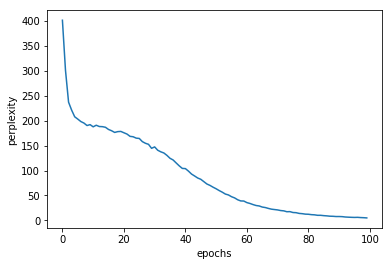

In [26]:
# coding: utf-8
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
from simple_rnnlm import SimpleRnnlm


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]  # 입력
ts = corpus[1:]   # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 미니배치의 각 샘플의 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 취득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1

    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()

### 5.5.4 RNNLM의 Trainer 클래스